### Teleco Customer Churn

##### Dataset - source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4975,4822-LPTYJ,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),103.75,7346.2,No
6188,7542-CYDDM,Male,0,No,No,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,358.5,No
223,0742-MOABM,Male,0,Yes,No,4,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,50.05,179.35,Yes
817,0036-IHMOT,Female,0,Yes,Yes,55,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),103.70,5656.75,No
2812,3763-GCZHZ,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.05,6890,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df.shape

(7043, 20)

In [7]:
df1 = df[df.TotalCharges != ' ']
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4513,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.45,6440.25,Yes
5140,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.25,89.25,No
4995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
3870,Female,0,Yes,No,68,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,54.40,3723.65,No
6110,Female,0,Yes,No,19,Yes,No,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,No


In [8]:
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

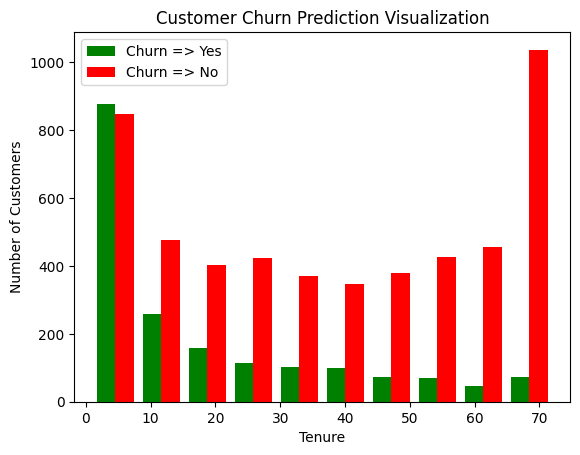

In [18]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['Churn => Yes', 'Churn => No'])
plt.legend()

In [23]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [24]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
df1.replace('No internet service', 'No', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\3740710625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [26]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [27]:
df1.replace('No phone service', 'No', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\2959975559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [28]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
df1.replace('No',0, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\1684599000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No',0, inplace = True)


In [30]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 0]
Dependents : [0 'Yes']
PhoneService : [0 'Yes']
MultipleLines : [0 'Yes']
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 'Yes']
OnlineBackup : ['Yes' 0]
DeviceProtection : [0 'Yes']
TechSupport : [0 'Yes']
StreamingTV : [0 'Yes']
StreamingMovies : [0 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : [0 'Yes']


In [31]:
df1.replace('Yes',1, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\3285117456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('Yes',1, inplace = True)


In [32]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [33]:
df1['gender'].replace({'Female':0, 'Male':1}, inplace =True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9816\2112631688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0, 'Male':1}, inplace =True)


In [36]:
df1['gender'].unique()

array([0, 1], dtype=int64)

In [37]:
print_unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [38]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5936,0,0,1,1,38,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4438,1,0,1,1,51,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4037,0,0,1,1,59,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [40]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [41]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1597,1,0,1,0,0.661972,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0
5942,0,0,1,0,0.112676,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1502,1,0,1,0,0.676056,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [43]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [45]:
x_train.shape

(5625, 26)

In [57]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape= (26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_train, y_train, epochs = 120)

Epoch 1/120
176/176 [==============================] - 1s 2ms/step - loss: 0.5150 - accuracy: 0.7419
Epoch 2/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7918
Epoch 3/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8021
Epoch 4/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8021
Epoch 5/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8052
Epoch 6/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8073
Epoch 7/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8069
Epoch 8/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8064
Epoch 9/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8060
Epoch 10/120
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accura

In [58]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7825


[0.44564539194107056, 0.7825160026550293]

In [59]:
yp = model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [60]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [61]:
y_pred = []
for ele in yp:
    if ele > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

In [62]:
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [63]:
len(y_pred)

1407

In [64]:
len(x_test)

1407

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(33.22222222222222, 0.5, 'Truth')

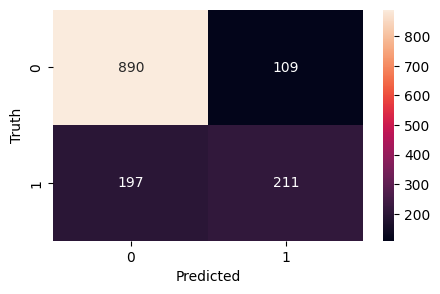

In [68]:
 import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure( figsize = (5,3))
sns.heatmap( cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Bank Customer Churn

##### Dataset - source : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
df = pd.read_csv('Bank_Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7844,7845,15667633,Allen,612,France,Female,38,1,0.00,2,1,1,9209.21,0
2212,2213,15770974,Nwabugwu,741,Germany,Female,37,8,170840.08,2,0,0,109843.16,0
4950,4951,15771383,Loggia,628,Germany,Female,45,6,53667.44,1,1,0,115022.94,0
9877,9878,15572182,Onwuamaeze,505,Germany,Female,33,3,106506.77,3,1,0,45445.78,1
1643,1644,15708048,Burn,631,France,Female,34,4,124379.14,1,1,0,106892.91,0


In [72]:
columns_to_drop = ['RowNumber', 'CustomerId','Surname']
df.drop(columns = columns_to_drop, inplace = True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')
            
            
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [74]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [76]:
df1['Gender'].replace({'Female':0, 'Male':1}, inplace =True)

In [77]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [78]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3959,663,1,49,7,116150.65,3,1,1,84358.71,1,0,1,0
7957,850,0,34,3,129668.43,2,1,1,88743.99,0,0,1,0
2595,633,1,29,10,130206.28,1,1,0,184654.87,0,1,0,0
7342,502,1,30,4,0.00,2,1,1,66263.87,0,1,0,0
9070,468,1,26,1,131643.25,1,1,0,64436.16,0,0,0,1


In [79]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [80]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [81]:
x = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [84]:
x.shape

(10000, 12)

In [85]:
x_train.shape

(8000, 12)

In [102]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(8, input_shape= (12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_train, y_train, epochs = 180)

Epoch 1/180
250/250 [==============================] - 1s 2ms/step - loss: 0.5959 - accuracy: 0.6950
Epoch 2/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7960
Epoch 3/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7985
Epoch 4/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8029
Epoch 5/180
250/250 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8040
Epoch 6/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8060
Epoch 7/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8080
Epoch 8/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8100
Epoch 9/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8134
Epoch 10/180
250/250 [==============================] - 0s 2ms/step - loss: 0.4374 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8631
Epoch 161/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8602
Epoch 162/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8609
Epoch 163/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8606
Epoch 164/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8597
Epoch 165/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8615
Epoch 166/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8615
Epoch 167/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8605
Epoch 168/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8609
Epoch 169/180
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - a

In [103]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8530


[0.355526864528656, 0.8529999852180481]

In [104]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [105]:
y_pred = []
for ele in yp:
    if ele > 0.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

In [106]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(33.22222222222222, 0.5, 'Truth')

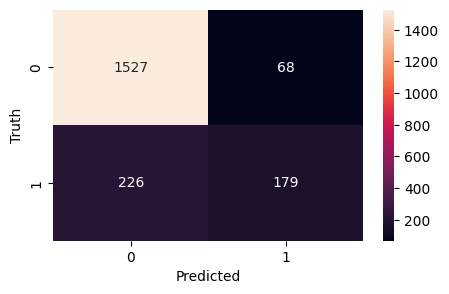

In [107]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure( figsize = (5,3))
sns.heatmap( cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')